In [2]:
import numpy as np 
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("C:/DL/spam.csv", encoding='latin')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
data.columns

Index(['label', 'message'], dtype='object')

In [15]:

#Naming the columns
data = data.rename(columns = {'v1':'label','v2':'message'})



In [16]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
data.shape

(5572, 2)

In [19]:
data.describe(include='object')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [21]:
# Mapping values for label
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [23]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
data.isnull().sum()

label      0
message    0
dtype: int64

In [25]:
data.duplicated().sum()

403

In [26]:
data.drop_duplicates(keep='first', inplace=True)

In [27]:
data.shape

(5169, 2)

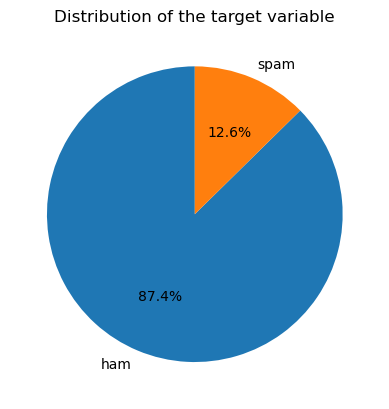

In [29]:
plt.pie(data['label'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of the target variable')
plt.show()

In [30]:
only_spam = data[data['label'] == 1]
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(data.shape[0] - only_spam.shape[0]))

Number of Spam records: 653
Number of Ham records: 4516


In [31]:
#Balancing the Dataset Using Oversampling
#The oversampling technique is used to balance the dataset by duplicating the minority class (Spam records) until the dataset becomes approximately balanced

In [32]:
count = int((data.shape[0] - only_spam.shape[0]) / only_spam.shape[0])
for i in range(0, count - 1):
    data = pd.concat([data, only_spam])


In [33]:
data.shape

(8434, 2)

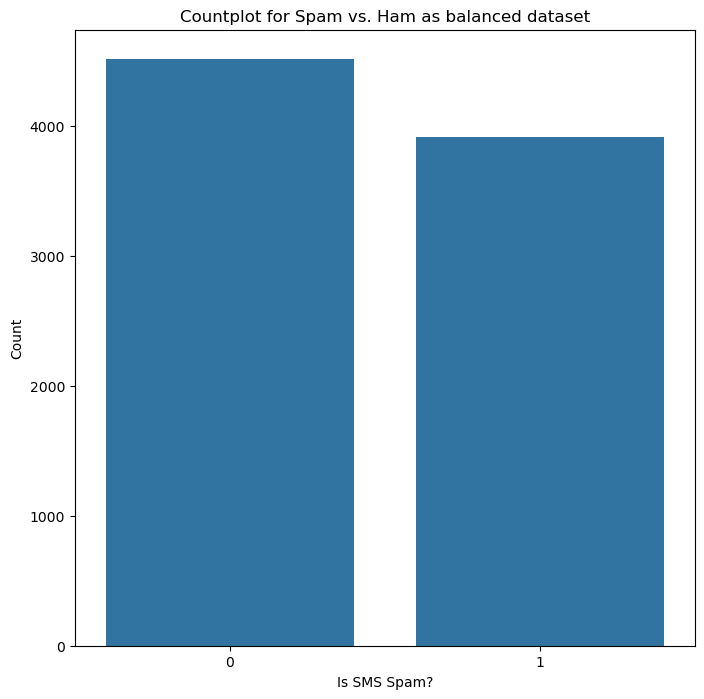

In [34]:
plt.figure(figsize=(8, 8))
g = sns.countplot(x='label', data=data)
p = plt.title('Countplot for Spam vs. Ham as balanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

In [37]:
# Creating new feature word_count
data['word_count'] = data['message'].apply(lambda x: len(x.split()))

In [39]:
data.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


In [40]:
# Creating feature contains_currency_symbol
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0

data['contains_currency_symbol'] = data['message'].apply(currency)

In [41]:
data.tail()

,label,message,word_count,contains_currency_symbol
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0
5567,1,This is the 2nd time we have tried 2 contact u...,30,1


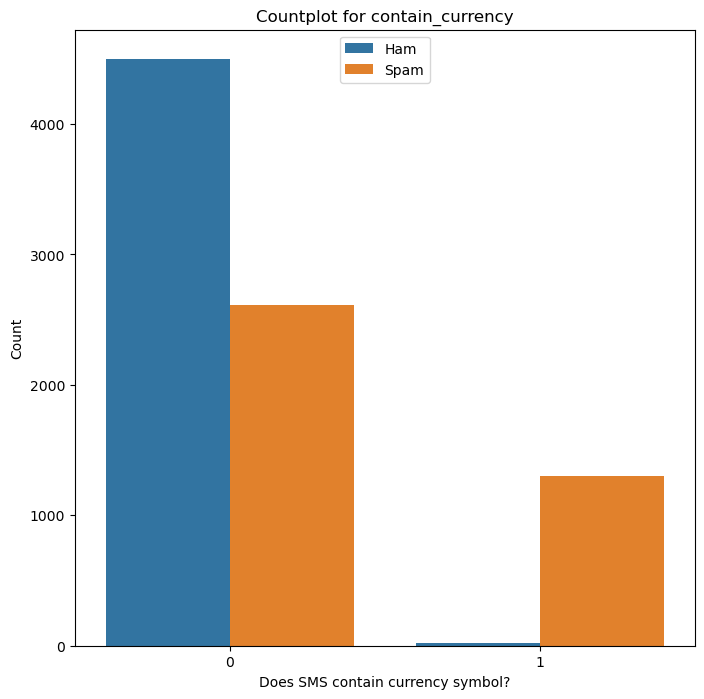

In [43]:
# Countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbol', data=data, hue='label')
p = plt.title('Countplot for contain_currency')
p = plt.xlabel('Does SMS contain currency symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

In [45]:
# Creating feature contains_number
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

data['contains_number'] = data['message'].apply(numbers)

In [46]:
data.tail()

,label,message,word_count,contains_currency_symbol,contains_number
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1
5567,1,This is the 2nd time we have tried 2 contact u...,30,1,1


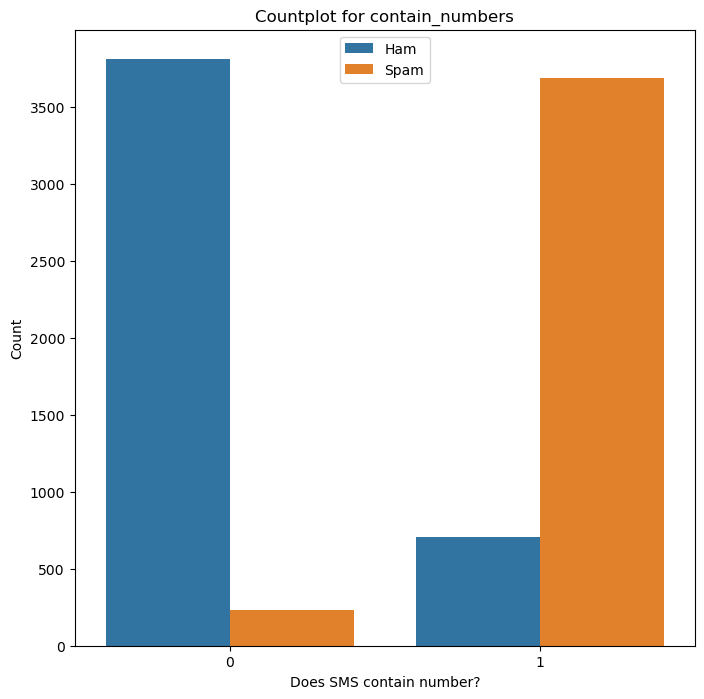

In [48]:
# Countplot for contains_number
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=data, hue='label')
p = plt.title('Countplot for contain_numbers')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

In [49]:
#Data Cleaning:

#Removing special character and numbers using regular expression
#Converting the entire sms into lower case
##Tokenizing the sms by words
##Removing the stop words
##Lemmatizing the words
##Joining the lemmatized words
##Building a corpus of messages

In [50]:
# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ghada\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ghada\AppData\Roaming\nltk_data...


In [51]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(data.message):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

In [57]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()


In [59]:
# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = data['label']

In [60]:
X

,ac,access,account,address,admirer,age,ah,already,also,always,...,ya,yeah,year,yes,yesterday,yet,yo,yr,yup,zed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.40486,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.329631,0.0,0.0,0.0,0.0,0.0,0.0
8431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.287619,0.0,0.0,0.0,0.0,0.0,0.0
8432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

In [65]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
svc = SVC(kernel='sigmoid', gamma=1.0)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
dtc = DecisionTreeClassifier(max_depth=5)
mnb = MultinomialNB()
bnb = BernoulliNB()
classifiers = {
    'K Neighbors Classifier': knn,
    'Random Forest Classifier': rfc,
    'Decision Tree Classifier': dtc,
    'Multinomial Naive Bayes': mnb, 
    'Bernoulli Naive Bayes': bnb
}
def evaluate_vectorizer(X_train, X_test, y_train, y_test, classifiers):
    precision_scores = []
    accuracy_scores = []
    
    for name, model in classifiers.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate precision and accuracy
        precision = precision_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the results
        precision_scores.append(precision)
        accuracy_scores.append(accuracy)
    
    # Create a DataFrame to hold the performance scores
    performance_df = pd.DataFrame({'Model': list(classifiers.keys()), 
        'Accuracy': accuracy_scores, 
        'Precision': precision_scores
    }).sort_values(by='Precision', ascending=False)
    
    return performance_df

In [66]:
performance= evaluate_vectorizer(X_train, X_test, y_train, y_test, classifiers)
print(performance)

                      Model  Accuracy  Precision
4     Bernoulli Naive Bayes  0.961470   0.991573
1  Random Forest Classifier  0.994072   0.990897
0    K Neighbors Classifier  0.986366   0.984334
3   Multinomial Naive Bayes  0.947244   0.944737
2  Decision Tree Classifier  0.891523   0.936937


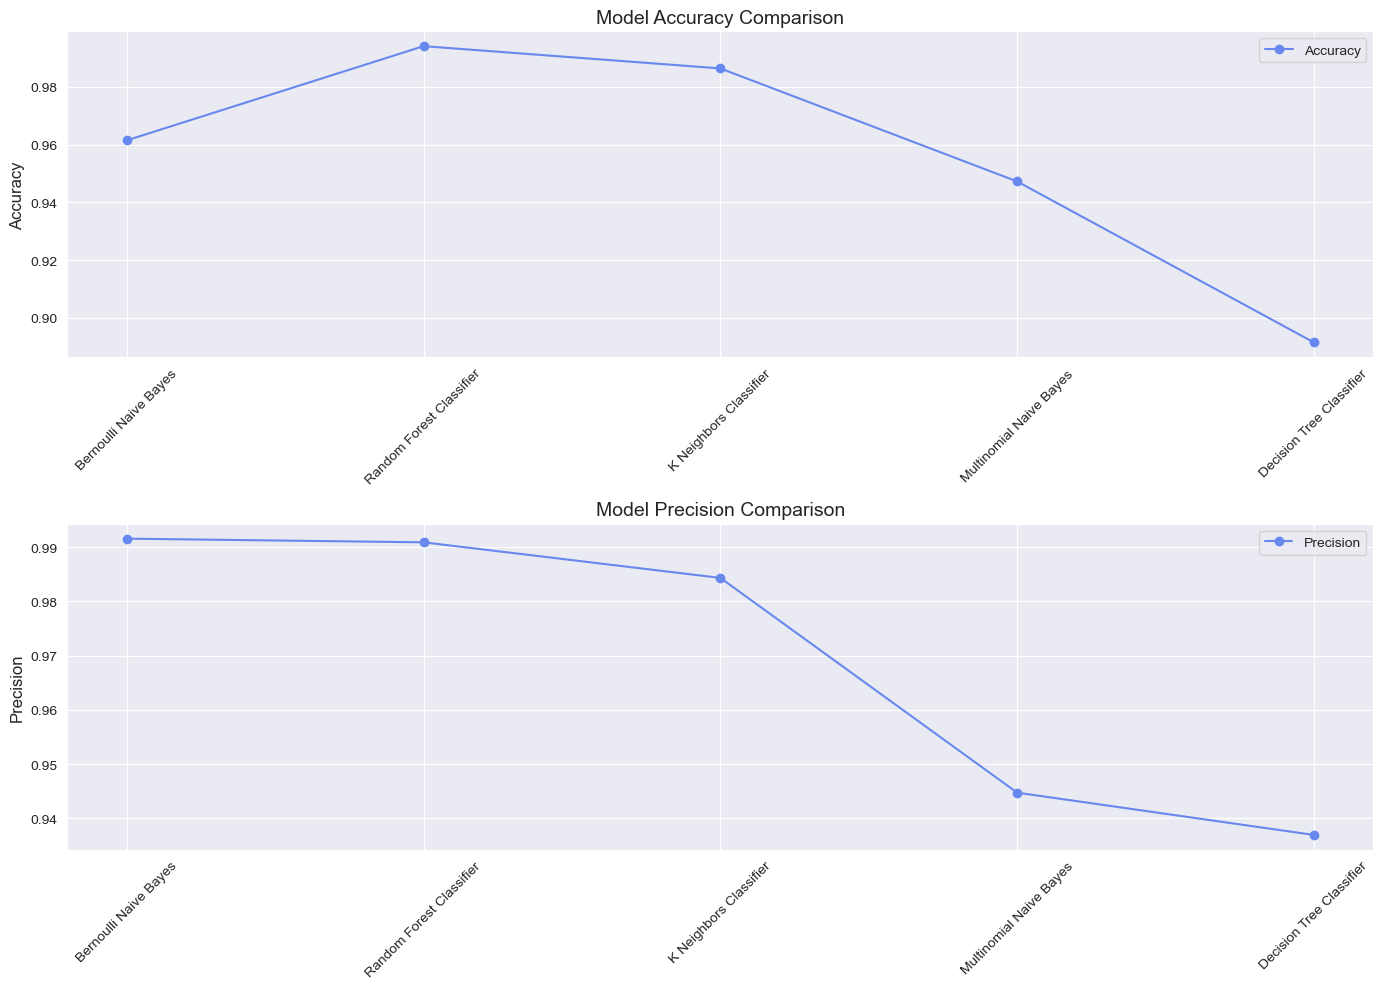

In [70]:
performance_df = pd.DataFrame(performance)

# Plotting performance metrics
fig, ax = plt.subplots(2, 1, figsize=(14, 10))
sns.set_palette('coolwarm')
sns.set_style('darkgrid')

# Accuracy Plot
for col in ["Accuracy"]:
    ax[0].plot(performance_df["Model"], performance_df[col], marker="o", label=col)
    ax[0].set_title("Model Accuracy Comparison", fontsize=14)
    ax[0].set_ylabel("Accuracy", fontsize=12)
    ax[0].legend()
    ax[0].grid(True)
    ax[0].tick_params(axis='x', rotation=45)
# Precision Plot
for col in ["Precision"]:
    ax[1].plot(performance_df["Model"], performance_df[col], marker="o", label=col)
    ax[1].set_title("Model Precision Comparison", fontsize=14)
    ax[1].set_ylabel("Precision", fontsize=12)
    ax[1].legend()
    ax[1].grid(True)
    ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [73]:
def predict_spam(sample_message, model):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return model.predict(temp)

In [75]:
# Prediction 1 - Lottery text message
sample_message = 'ALERT - You might be eligible for a tax refund of up to £2,500. Reply TAX to find out more or STOP to unsubscribe.'

if predict_spam(sample_message,bnb):
  print('This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a SPAM message.


C:\Users\ghada\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


In [77]:
 'I just realized I haven’t checked my email in days. I wonder if there’s anything important.'

if predict_spam(sample_message,bnb):
  print('This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


C:\Users\ghada\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
